<a href="https://colab.research.google.com/github/csm-kr/distance_study/blob/master/SMOGN_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def get_points_from_circle(r, theta):
    num_points = int(2 * np.pi / theta)
    points = []
    for i in range(0, num_points):
        theta_ = i * theta
        point = [r * np.cos(theta_), r * np.sin(theta_)]
        points.append(point)
    return np.array(points)

In [26]:
def get_points():

    # add center
    points = np.array([[0, 0]])
    points = np.concatenate([points, get_points_from_circle(r=50, theta=np.pi/4)], axis=0)
    points = np.concatenate([points, get_points_from_circle(r=100, theta=np.pi/6)], axis=0)
    points = np.concatenate([points, get_points_from_circle(r=150, theta=np.pi/8)], axis=0)

    return points

박막의 point들 가져옴

In [27]:
def get_gaussian_2d(x, y, sigma_x=100**2, sigma_y=100**2):
    z = (1. / (2 * np.pi * sigma_x * sigma_y) * np.exp(-(x ** 2 / (2 * sigma_x ** 2) + y ** 2 / (2 * sigma_y ** 2))))
    return z

In [28]:
points = get_points()
x = points[:, 0]
y = points[:, 1]

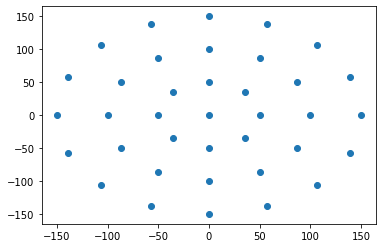

In [29]:
plt.scatter(x, y)

Assume : K = 483

In [30]:
 # K = 483
z = get_gaussian_2d(x, y, sigma_x=100**2, sigma_y=100**2)

Assume : K = 463

In [31]:
 # K = 463
z1 = get_gaussian_2d(x, y, sigma_x=100**2, sigma_y=100**2-0.5)

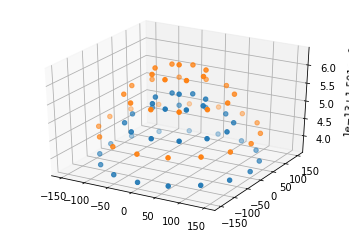

In [32]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z)
ax.scatter(x, y, z1)
plt.show()

In [33]:
# augmentation 수 
num_augs = 2
dis = np.abs(z - z1) / num_augs

epsilon_01 = np.random.normal(loc=0, scale=dis/6) # 3 sigma 안에 99% 들어오도록 
print(epsilon_01)
z_01 = z + dis + epsilon_01

[ 3.79221951e-15  7.02569409e-15  1.30793751e-14 -2.23244234e-15
 -1.61866901e-15 -2.04929689e-15  3.13958466e-15  9.70635134e-17
 -1.10716977e-15 -1.05759002e-14 -1.04807480e-15 -4.51745505e-15
  1.10135089e-15 -1.16887165e-14 -2.84808360e-15  5.58750236e-15
  6.18091252e-15  2.17042056e-15  3.32213690e-15  7.66297254e-15
 -6.25426761e-16 -7.30015658e-15  2.03479232e-15 -1.96851873e-15
 -1.83643191e-15 -4.03129247e-15 -3.69877272e-15 -1.00459405e-15
  1.81928643e-15  1.51201543e-15  7.62406709e-15 -6.97556283e-15
 -9.02334250e-15 -1.54744578e-15 -2.78300734e-15  3.33869118e-15
 -6.03143866e-16]


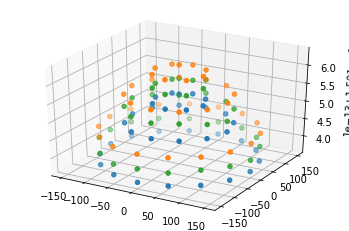

In [34]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z)
ax.scatter(x, y, z1)
ax.scatter(x, y, z_01)
plt.show()